# Tutorial

## 1. Data preparation

* ###  To generate new dataframe

In [3]:
from generate_dataframe.source.prepare_data import get_data

# provide sizes
train_size = 10000
test_size = 5000

x_train, y_train, x_test, y_test = get_data(train_size, test_size)


* ### To load already existing

In [4]:
from generate_dataframe.source.prepare_data import load_existing_data

# provide path (/generate_dataframe/generated/generated_data.npz)

x_train, y_train, x_test, y_test = load_existing_data("generate_dataframe/generated/generated_data.npz")

## 2. Load reference samples

In [13]:
import numpy as np
samples = np.load("./generate_dataframe/data/reference_samples.npz")

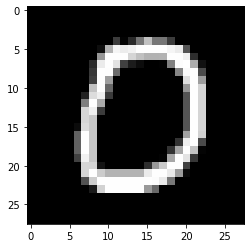

In [16]:
# check if everything is loaded properly
import matplotlib.pyplot as plt

pixels = samples['Zero'][0].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

## 3. Working with the model

* ### To load existing model

In [18]:
from model.siamese_network import SiameseNetwork

input_dim = x_train.shape[2:]
SiameseNetwork.margin = 1
model = SiameseNetwork(input_dim)
model.load_model("weights/model_v1.h5")

* ### To train new model

In [19]:
from model.siamese_network import SiameseNetwork

# provide batch_size and n_epochs
batch_size = 32
n_epochs = 10

input_dim = x_train.shape[2:]
SiameseNetwork.margin = 1
model = SiameseNetwork(input_dim)
model.fit(x_train, y_train, batch_size,n_epochs)

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1774 - val_loss: 0.0552
Epoch 2/10
7500/7500 [==============================] - 5s 703us/step - loss: 0.1024 - val_loss: 0.0305
Epoch 3/10
7500/7500 [==============================] - 5s 688us/step - loss: 0.0675 - val_loss: 0.0483
Epoch 4/10
7500/7500 [==============================] - 5s 691us/step - loss: 0.0493 - val_loss: 0.0435
Epoch 5/10
7500/7500 [==============================] - 5s 693us/step - loss: 0.0388 - val_loss: 0.0290
Epoch 6/10
7500/7500 [==============================] - 5s 691us/step - loss: 0.0291 - val_loss: 0.0168
Epoch 7/10
7500/7500 [==============================] - 5s 690us/step - loss: 0.0235 - val_loss: 0.0277
Epoch 8/10
7500/7500 [==============================] - 5s 690us/step - loss: 0.0175 - val_loss: 0.0237
Epoch 9/10
7500/7500 [==============================] - 5s 692us/step - loss: 0.0155 - val_loss: 0.0459
Epoch 10/10
7500/

* ### To save model  

In [24]:
# provide model name

model_name = "model_v2"
model.save_model("weights/"+model_name+".h5")

## 4. Making predictions and evaluating accuracy 

In [29]:
from model.accuracy import Accuracy

prediction = model.make_prediction(x_test)
acc = Accuracy.compute_accuracy(y_test, prediction)
print(acc)

0.9566


## 5. Testing the ability to compare

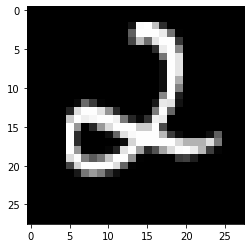

(28, 28)

In [42]:
# picking random number from test dataframe

number = 1
names = ['Zero', 'One', 'Two', 'Three' , 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

digit = x_test[number][0][0]
plt.imshow(digit, cmap='gray')
plt.show()

In [48]:
# creating dataframe to find the most suitable number

inner_range = samples['Zero'].shape[0]
df = np.zeros([len(names)*inner_range,2,1,28,28])

for i, name in enumerate(names):
    for j in range(inner_range):
        df[inner_range*i + j, 0, 0, :, :] = digit
        df[inner_range*i + j, 1, 0, :, :] = samples[name][j]

In [52]:
# making prediction

comparison_predict = model.make_prediction(df)

In [55]:
# getting probability values

transform = lambda x: 1-x
probabilities = transform(comparison_predict)

In [64]:
# finding writing quality assessment

np.argmax(probabilities)
quality = int(10*probabilities[np.argmax(probabilities)])

Standart


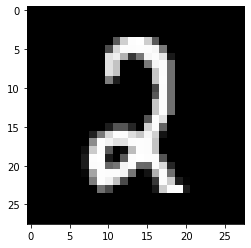

Written


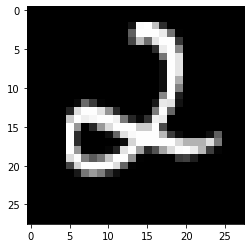

Quality assesment: 9


In [75]:
# print written symbol and int standart + writing quality

print("Standart")
plt.imshow(samples[names[np.argmax(probabilities)//5]][np.argmax(probabilities)%5], cmap='gray')
plt.show()
print("Written")
plt.imshow(digit, cmap='gray')
plt.show()
print("Quality assesment: {:d}".format(quality))